In [1]:
#Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium 
import seaborn as sns 
import pycountry_convert as pyc
import datetime as dt 
import plotly.express as px
%matplotlib inline


In [2]:
us_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv')

us_cases.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [3]:
us_cases.shape

(2485, 12)

In [4]:
us_cases = us_cases.loc[us_cases['Country_Region'] == 'US']
us_cases.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [5]:
us_cases.shape

(2230, 12)

In [6]:
#Let drop and rename columns 

usa_df = us_cases.drop(['Combined_Key', 'FIPS'], axis=1)

usa_df.head()

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0
1,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0
2,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0
3,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0
4,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0


In [7]:
usa_df_clean = usa_df.rename(columns={'Admin2': 'City',
                      'Province_State': 'State'})


usa_df_clean.head()

,City,State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0
1,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0
2,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0
3,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0
4,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0


In [8]:
usa_df_clean['City_State'] = usa_df_clean['City'] + ", " + usa_df_clean['State']

usa_df_clean.head()

,City,State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,City_State
0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina"
1,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana"
2,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia"
3,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho"
4,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa"


In [9]:
#Let see the total confirmed and deaths as of 4/2/2020 

total_sum = usa_df_clean.sum()

total_df = pd.DataFrame(total_sum).transpose().loc[:,['Confirmed','Deaths']]

total_df['Mortality Rate in US (%)'] = np.round(total_df['Deaths']/total_df['Confirmed'] * 100,2)

total_df

,Confirmed,Deaths,Mortality Rate in US (%)
0,213372.0,4757.0,2.23


In [50]:
#They included US territories as well Guam, Puerto Rico, and the two cruise ships 
state_by_state = usa_df_clean[['State','Confirmed', 'Deaths']]
state_by_state['State'].unique()

array(['South Carolina', 'Louisiana', 'Virginia', 'Idaho', 'Iowa',
       'Missouri', 'Oklahoma', 'Colorado', 'Illinois', 'Indiana',
       'Mississippi', 'Nebraska', 'Pennsylvania', 'Washington', 'Vermont',
       'Florida', 'North Carolina', 'California', 'New York', 'Wyoming',
       'Michigan', 'Kentucky', 'Ohio', 'Alaska', 'Tennessee', 'Texas',
       'Maine', 'Maryland', 'Minnesota', 'Arizona', 'Georgia', 'Arkansas',
       'Wisconsin', 'Kansas', 'New Jersey', 'South Dakota', 'Alabama',
       'West Virginia', 'North Dakota', 'Massachusetts', 'New Hampshire',
       'Oregon', 'New Mexico', 'Utah', 'Rhode Island', 'Montana',
       'Nevada', 'District of Columbia', 'Connecticut', 'Hawaii',
       'Delaware', 'Diamond Princess', 'Grand Princess', 'Guam',
       'Northern Mariana Islands', 'Puerto Rico', 'Recovered',
       'Virgin Islands'], dtype=object)

In [107]:
#Let see which states are most affected 
fifty_two_states = state_by_state.groupby(['State'])['Confirmed', 'Deaths'].sum().sort_values('Confirmed', ascending=False)
# .style.background_gradient(cmap ='Blues', subset=['Confirmed']).background_gradient(cmap ='Reds', subset=['Deaths'])
fifty_two_states.head(10)


,Confirmed,Deaths
State,,
New York,83948,1941
New Jersey,22255,355
California,9399,199
Michigan,9315,335
Massachusetts,7738,122
Illinois,6980,141
Florida,6956,87
Louisiana,6424,273
Pennsylvania,6009,74


In [84]:
#Removed the territories to only show the 52 states 
fifty_two_states_df = fifty_two_states.iloc[:52]
fifty_two_states_df.reset_index().head()

,State,Confirmed,Deaths
0,New York,83948,1941
1,New Jersey,22255,355
2,California,9399,199
3,Michigan,9315,335
4,Massachusetts,7738,122


In [89]:
#Load in population data set, pulled from https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html 

us_pop_2019 = pd.read_csv('Resources/us_pop_2019.csv')
us_pop_2019.head()

#Merge onto fifty_two_states_df to see how much population is infected 
states_pop = fifty_two_states_df.merge(us_pop_2019, on ='State')
states_pop.head()

,State,Confirmed,Deaths,Population
0,New York,83948,1941,19453561
1,New Jersey,22255,355,8882190
2,California,9399,199,39512223
3,Michigan,9315,335,9986857
4,Massachusetts,7738,122,6892503


In [110]:
state_mort = fifty_two_states_df.groupby(['State'])['Confirmed', 'Deaths'].sum().sort_values('Confirmed', ascending = False)
state_mort['Mortality Rate %'] = np.round(state_mort['Deaths']/state_mort['Confirmed'] * 100, 2)
state_mort.head()

,Confirmed,Deaths,Mortality Rate %
State,,,
New York,83948,1941,2.31
New Jersey,22255,355,1.60
California,9399,199,2.12
Michigan,9315,335,3.60
Massachusetts,7738,122,1.58


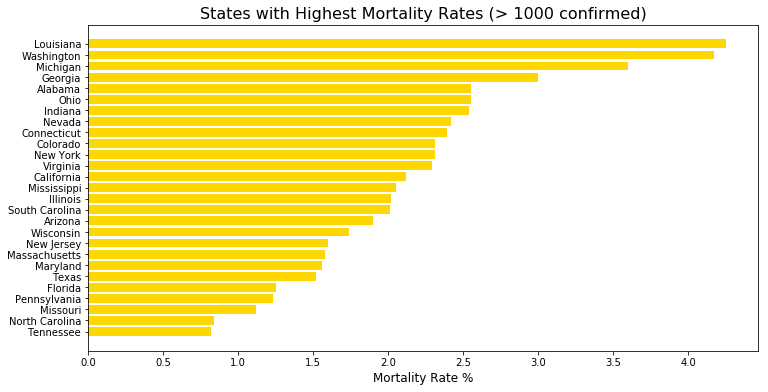

In [121]:
#States with the highest mortality with more than 1000 confirmed cases. The median was 1066 for confirmed cases.

fig = plt.figure(figsize=(12,6))
# plt.xlim(.5, 7)

plt.barh(state_mort.loc[state_mort['Confirmed'] > 1000].sort_values('Mortality Rate %')['Mortality Rate %'].index,
         state_mort.loc[state_mort['Confirmed'] > 1000].sort_values('Mortality Rate %')['Mortality Rate %'].values, color='gold')
plt.title("States with Highest Mortality Rates (> 1000 confirmed)", fontsize=16)
plt.xlabel('Mortality Rate %', fontsize=12)
plt.show()

In [97]:
# usa_df_clean= usa_df_clean.drop(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Recovered', 'Active', 'City', 'State'], axis=1)

#Created a DF with top 10 cities based on number of deaths 
top_ten_df = usa_df_clean.sort_values('Deaths', ascending=False)[:11].set_index('City_State')

top_ten_df.style.background_gradient(cmap='OrRd')
#Dropped the second NY Row since it had an unassigned city 

i = top_ten_df[top_ten_df['Confirmed'] == 0].index

# top_ten_mort = top_ten_df.drop(i)
top_ten_mort.style.background_gradient(cmap='OrRd')

,Confirmed,Deaths
City_State,,
"New York City, New York",47439,1139
"King, Washington",2330,150
"Wayne, Michigan",4470,146
"Orleans, Louisiana",2270,115
"Oakland, Michigan",1910,99
"Cook, Illinois",5152,95
"Nassau, New York",9554,76
"Bergen, New Jersey",3494,75
"Essex, New Jersey",2262,69


In [105]:
top_ten_mort['Mortality Rate %'] = np.round(top_ten_mort['Deaths']/top_ten_mort['Confirmed'] * 100, 2)
top_ten_mort.style.background_gradient(cmap='OrRd')

,Confirmed,Deaths,Mortality Rate %
City_State,,,
"New York City, New York",47439,1139,2.4
"King, Washington",2330,150,6.44
"Wayne, Michigan",4470,146,3.27
"Orleans, Louisiana",2270,115,5.07
"Oakland, Michigan",1910,99,5.18
"Cook, Illinois",5152,95,1.84
"Nassau, New York",9554,76,0.8
"Bergen, New Jersey",3494,75,2.15
"Essex, New Jersey",2262,69,3.05


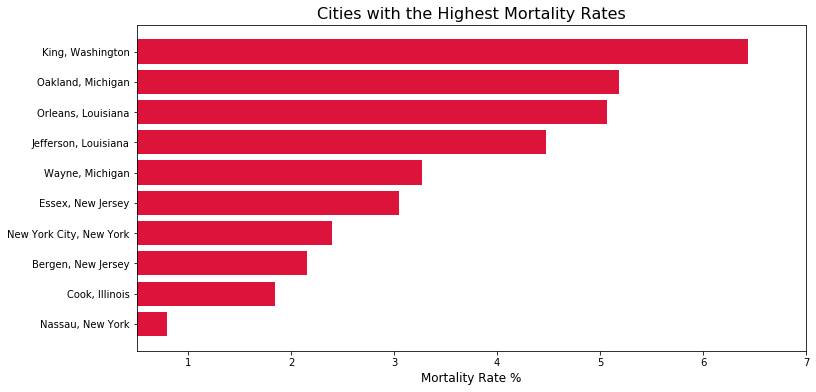

In [120]:
#States with the highest mortality in areas with at least 1000 confirmed cases 
fig = plt.figure(figsize=(12,6))
plt.xlim(.5, 7)
plt.barh(top_ten_mort.sort_values('Mortality Rate %')['Mortality Rate %'].index,
         top_ten_mort.sort_values('Mortality Rate %')['Mortality Rate %'].values, color='crimson')
plt.title("Cities with the Highest Mortality Rates", fontsize=16)
plt.xlabel('Mortality Rate %', fontsize=12)
plt.show()

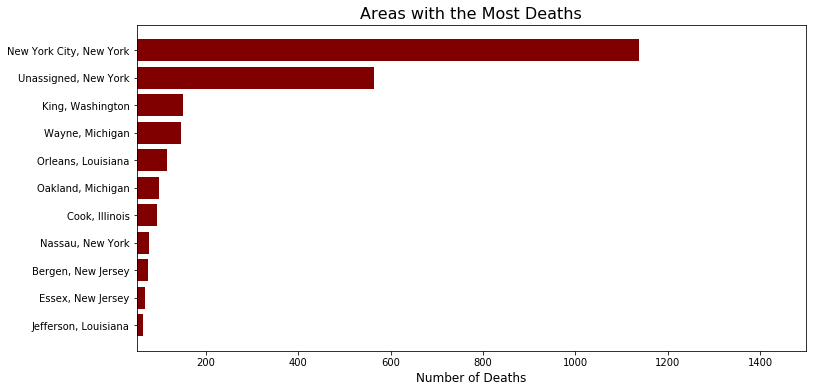

In [106]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot()
plt.xlim(50,1500)

plt.barh(top_ten_df.sort_values('Deaths')['Deaths'].index,
         top_ten_df.sort_values('Deaths')['Deaths'].values, color='maroon')

plt.title('Areas with the Most Deaths', fontsize=16)
plt.xlabel('Number of Deaths', fontsize=12)
plt.show()

In [102]:
top_ten_conf = usa_df_clean.sort_values('Confirmed', ascending= False).set_index('City_State')[:10]
top_ten_conf.style.background_gradient(cmap='OrRd')

,Confirmed,Deaths
City_State,,
"New York City, New York",47439,1139
"Westchester, New York",10683,25
"Nassau, New York",9554,76
"Suffolk, New York",7605,53
"Cook, Illinois",5152,95
"Unassigned, New Jersey",4512,0
"Wayne, Michigan",4470,146
"Los Angeles, California",3518,64
"Bergen, New Jersey",3494,75


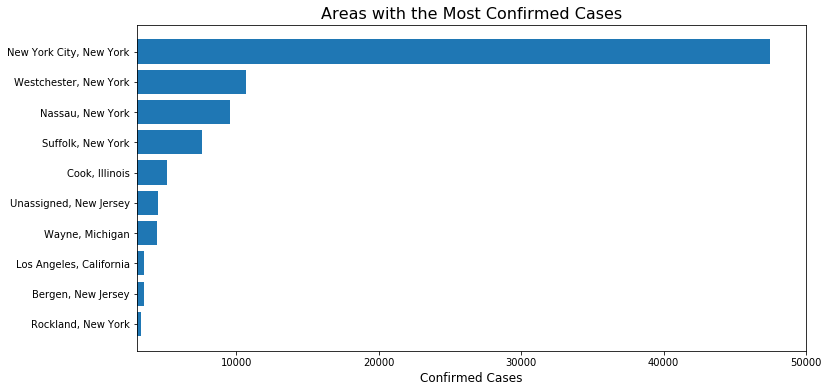

In [104]:
#States with the most confirmed cases. It's clear that New York is the epicenter in the US.
plt.figure(figsize=(12,6))
plt.xlim(3000, 50000)

plt.barh(top_ten_conf.sort_values('Confirmed')['Confirmed'].index,
         top_ten_conf.sort_values('Confirmed')['Confirmed'].values)
plt.title('Areas with the Most Confirmed Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.show()